### <font color='blue'>Machine Learning na Segurança do Trabalho Prevendo a Eficiência de Extintores de Incêndio.</font>

 <font color='blue'>Atualizei o projeto em Python, diferentemente da versão desenvolvida em R. Nessa nova versão, realizamos o balanceamento da classe 'Status' e adicionamos três novos algoritmos de aprendizado de máquina: árvore de decisão, regressão logística e gradient boosting. Ao comparar o desempenho desses novos modelos com os modelos existentes, podemos identificar qual deles apresenta os melhores resultados para o problema em questão.</font>

##### Demanda:
Prever se a Chama do Extintor será Extinta ou Não! 

##### Organização do Projeto
- 1º Etapa - Análise Exploratória dos Dados
- 2º Etapa - Identificação de Problemas no Dataset
- 3º Etapa - Tratamento de Dados
- 4º Etapa - Análise Univariada! Explorando uma Variável por Vez!
- 5º Etapa - Pré-Processamento dos Dados
- 6º Etapa - Preparação dos Dados para Modelagem
- 7º Etapa - Conclusão

##### Descrição dos Dados:
- **Tamanho:** Representa o tamanho do recipiente de combustível, com valores categóricos (7 cm a 20 cm).
- **Combustível:** Tipo de combustível utilizado (Gasolina, Querosene, Diluente, GLP).
- **Distância:** Distância do recipiente em relação ao sistema de extinção (10 cm a 190 cm).
- **Decibel:** Nível de intensidade sonora (72 dB a 113 dB).
- **Fluxo de Ar:** Medido em m/s (0 a 17 m/s).
- **Frequência:** Frequência das ondas sonoras (1 Hz a 75 Hz).
- **Status:** Indica se a chama foi extinta (1) ou não (0).

##### Importar Pacotes

In [2]:
# Importando os pacotes que serão utilizados
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.2f}'.format

In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Projeto Extintor" --iversions

Author: Projeto Extintor

sklearn   : 1.3.0
pandas    : 2.0.0
matplotlib: 3.7.2
numpy     : 1.25.2
seaborn   : 0.12.2



##### Carregar os Dados

In [4]:
df = pd.read_excel("C:/FCD/ProjetosFer/2 - Prevendo Eficiência de Extintores de Incêndio/Acoustic_Extinguisher_Fire_Dataset.xlsx")

 #### <font color='blue'>1º Etapa - Análise Exploratória dos Dados</font>

In [5]:
# Verificar as primeiras linhas
df.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.00,75,0
1,1,gasoline,10,96,0.00,72,1
2,1,gasoline,10,96,2.60,70,1
3,1,gasoline,10,96,3.20,68,1
4,1,gasoline,10,109,4.50,67,1


In [6]:
# Verificar as últimas linhas
df.tail()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
17437,7,lpg,190,86,2.20,5,0
17438,7,lpg,190,84,2.00,4,0
17439,7,lpg,190,80,1.50,3,0
17440,7,lpg,190,76,0.40,2,0
17441,7,lpg,190,72,0.00,1,0


In [7]:
# Verificar a Dimensão dos dados
df.shape

(17442, 7)

#### Verificando o resumo das informações

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SIZE       17442 non-null  int64  
 1   FUEL       17442 non-null  object 
 2   DISTANCE   17442 non-null  int64  
 3   DESIBEL    17442 non-null  int64  
 4   AIRFLOW    17442 non-null  float64
 5   FREQUENCY  17442 non-null  int64  
 6   STATUS     17442 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 954.0+ KB


In [9]:
# Verificando a quantidade de Valores Nulos por Variável
df.isnull().sum()

SIZE         0
FUEL         0
DISTANCE     0
DESIBEL      0
AIRFLOW      0
FREQUENCY    0
STATUS       0
dtype: int64

In [10]:
# verificando o resumo estaístico das variáveis numéricas
df.describe()

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
count,17442.00,17442.00,17442.00,17442.00,17442.00,17442.00
mean,3.41,100.00,96.38,6.98,31.61,0.50
std,1.75,54.77,8.16,4.74,20.94,0.50
min,1.00,10.00,72.00,0.00,1.00,0.00
25%,2.00,50.00,90.00,3.20,14.00,0.00
50%,3.00,100.00,95.00,5.80,27.50,0.00
75%,5.00,150.00,104.00,11.20,47.00,1.00
max,7.00,190.00,113.00,17.00,75.00,1.00


**A cardinalidade nos ajuda a saber a quantidade de dados distintos em uma coluna**
- Se tivermos muitos valores distintos, provavelmente aquela coluna não será uma boa opção para usarmos no modelo
- Matematicamente, cardinalidade é o número de elementos de um conjunto
- Podemos verificar a cardinalidade usando o `.nunique()`

In [11]:
# Verificar os valores únicos
df.nunique()

SIZE           7
FUEL           4
DISTANCE      19
DESIBEL       39
AIRFLOW      127
FREQUENCY     54
STATUS         2
dtype: int64

#### <font color='blue'>2º Etapa - Identificação de Problemas no Dataset</font> 

- 1) Renomear variáveis para português
- 2) Transformar variável para category (SIZE,FUEL, DISTANCE, STATUS) para Análise Exploratória
- 3) Balanceamento de Classe (Target)
- 4) Converter as Variáveis Categóricas em Numéricas para o Modelo
- 5) Normalização das Variáveis Numéricas

#### <font color='blue'>3º Etapa - Tratamento de Dados</font>

##### 1) Renomear as Colunas

In [12]:
# Renomeando as colunas
df = df.rename(columns={'SIZE': 'Tamanho',
                        'FUEL': 'Combustivel',
                        'DISTANCE': 'Distancia',
                        'DESIBEL': 'Decibel',
                        'AIRFLOW': 'Fluxo_ar',
                        'FREQUENCY': 'Frequencia',
                        'STATUS': 'Status'})

In [13]:
df.head()

,Tamanho,Combustivel,Distancia,Decibel,Fluxo_ar,Frequencia,Status
0,1,gasoline,10,96,0.00,75,0
1,1,gasoline,10,96,0.00,72,1
2,1,gasoline,10,96,2.60,70,1
3,1,gasoline,10,96,3.20,68,1
4,1,gasoline,10,109,4.50,67,1


##### 2) Transformar as Variáveis para Categóricas

In [14]:
# Convertendo as variáveis para o tipo 'category'
df['Tamanho'] = df['Tamanho'].astype('category')
df['Combustivel'] = df['Combustivel'].astype('category')
df['Distancia'] = df['Distancia'].astype('category')
df['Status'] = df['Status'].astype('category')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Tamanho      17442 non-null  category
 1   Combustivel  17442 non-null  category
 2   Distancia    17442 non-null  category
 3   Decibel      17442 non-null  int64   
 4   Fluxo_ar     17442 non-null  float64 
 5   Frequencia   17442 non-null  int64   
 6   Status       17442 non-null  category
dtypes: category(4), float64(1), int64(2)
memory usage: 478.4 KB


#### <font color='blue'>4º Etapa - Análise Univariada! Explorando uma Variável por Vez!</font>

Nesta etapa, vamos separar as variáveis categóricas das numéricas para análise individual.

- Separar as Variáveis Categóricas e Numéricas
- Analisar as variáveis categóricas e a quantidade com gráficos (barplot)
- Analisar as variáveis numéricas e as suas distribuições com gráficos (histogramas, boxplot)

##### 1) Separando as Variáveis Categóricas e Numéricas

In [16]:
# Separando as variáveis categórias

categoricas = []
for i in df.columns[0:1309].tolist():
    if df.dtypes[i] == "object" or df.dtypes[i] == "category":
        categoricas.append(i)

In [17]:
# Variáveis categóricas
df[categoricas].head()

,Tamanho,Combustivel,Distancia,Status
0,1,gasoline,10,0
1,1,gasoline,10,1
2,1,gasoline,10,1
3,1,gasoline,10,1
4,1,gasoline,10,1


In [18]:
# Separando as variáveis Numéricas

numericas = []
for i in df.columns[0:1309].tolist():
    if df.dtypes[i] == "int64" or df.dtypes[i] == "float64":
        numericas.append(i)

In [19]:
# Variáveis numéricas
df[numericas].head()

,Decibel,Fluxo_ar,Frequencia
0,96,0.00,75
1,96,0.00,72
2,96,2.60,70
3,96,3.20,68
4,109,4.50,67


##### 2) Analisando as Variáveis Categóricas:

In [20]:
# Quantidade de Observações por "Tamanho"
df.groupby(["Tamanho"]).size()

Tamanho
1    3078
2    3078
3    3078
4    3078
5    3078
6    1026
7    1026
dtype: int64

##### Visualiação Gráfica

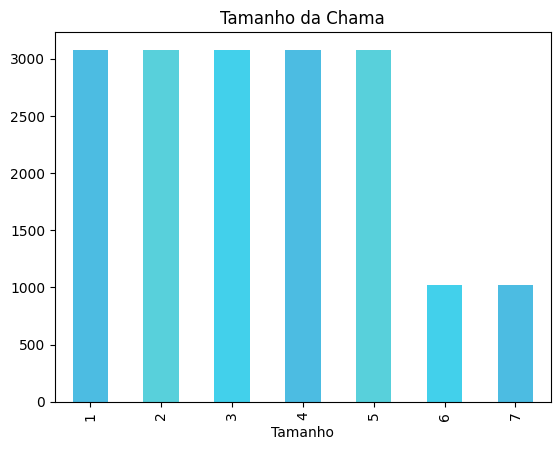

In [21]:
# Visualizando através do gráfico
df.Tamanho.value_counts().plot(kind="bar", title="Tamanho da Chama", color = ['#4CBCE2', '#58D0DB','#42D0EB']);

In [22]:
# Quantidade de Observações por "Combustivel"
df.groupby(["Combustivel"]).size()

Combustivel
gasoline    5130
kerosene    5130
lpg         2052
thinner     5130
dtype: int64

##### Visualiação Gráfica

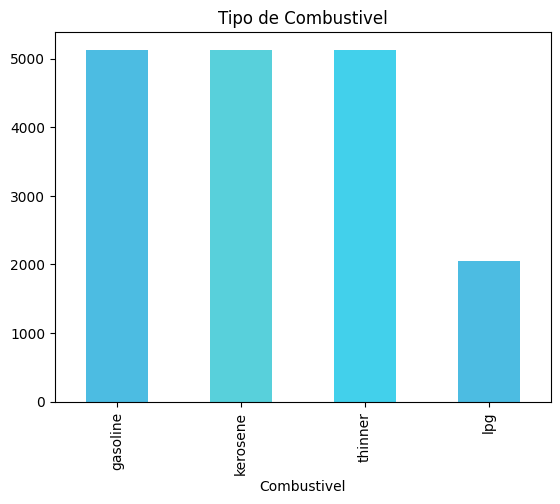

In [23]:
# Visualizando através do gráfico
df.Combustivel.value_counts().plot(kind="bar", title="Tipo de Combustivel", color = ['#4CBCE2', '#58D0DB','#42D0EB']);

In [24]:
# Quantidade de Observações por "Distancia"
df.groupby(["Distancia"]).size()

Distancia
10     918
20     918
30     918
40     918
50     918
60     918
70     918
80     918
90     918
100    918
110    918
120    918
130    918
140    918
150    918
160    918
170    918
180    918
190    918
dtype: int64

##### Visualiação Gráfica

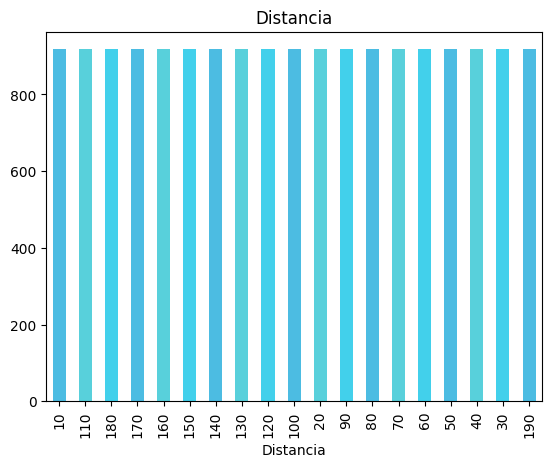

In [25]:
# Visualizando através do gráfico
df.Distancia.value_counts().plot(kind="bar", title="Distancia", color = ['#4CBCE2', '#58D0DB','#42D0EB']);

In [26]:
# Quantidade de Observações por "Status"
df.groupby(["Status"]).size()

Status
0    8759
1    8683
dtype: int64

##### Visualiação Gráfica

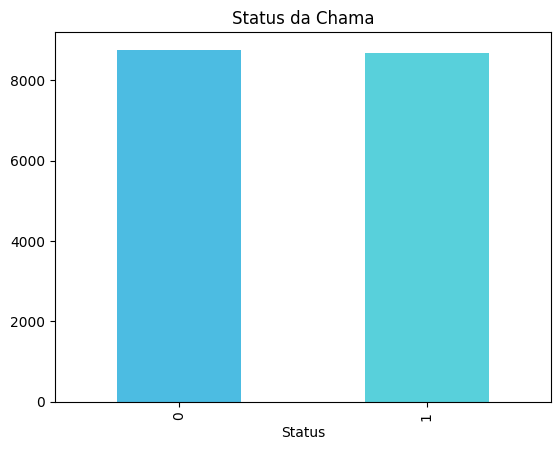

In [27]:
# Visualizando através do gráfico
df.Status.value_counts().plot(kind="bar", title="Status da Chama", color = ['#4CBCE2', '#58D0DB','#42D0EB']);

##### 3) Analisando as Variáveis Numéricas:

In [28]:
# Quantidade de Observações por "Decibel"
df.groupby(['Decibel']).size()

Decibel
72       17
74      119
75      136
76       51
78       85
79       51
80      119
82       34
83       85
84      119
85      238
86      442
87      425
88      561
89      782
90     1105
91      969
92     1462
93      765
94      646
95      765
96     1360
97      272
98       51
99       34
100     119
101     255
102     612
103     595
104     867
105    1071
106    1360
107     612
108     646
109     187
110     272
111     102
112      34
113      17
dtype: int64

In [29]:
df[numericas].head()

,Decibel,Fluxo_ar,Frequencia
0,96,0.00,75
1,96,0.00,72
2,96,2.60,70
3,96,3.20,68
4,109,4.50,67


##### Visualiação Gráfica com Histograma

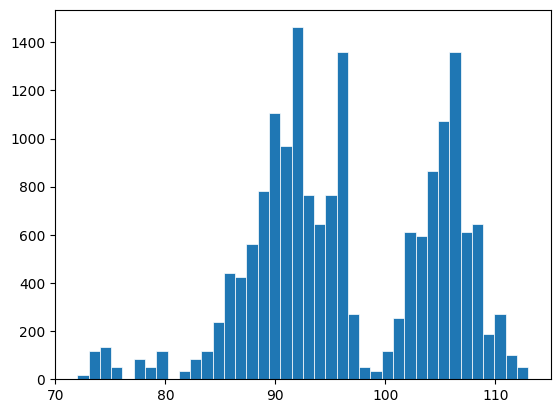

In [30]:
# Verificando o histograma das Decibel
x = df.Decibel

# plot:
fig, ax = plt.subplots()

ax.hist(x, bins=40, linewidth=0.5, edgecolor="white")

plt.show()

##### Visualiação Gráfica com Boxplot

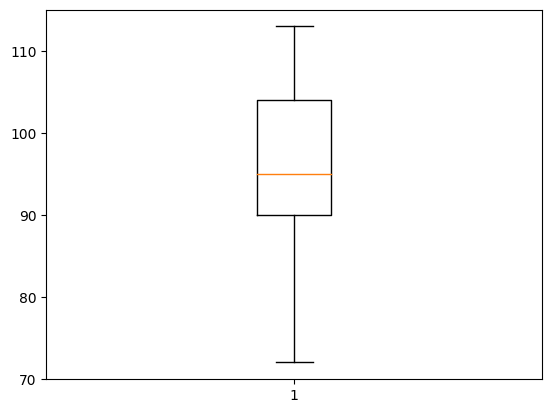

In [31]:
# Verificando o boxplot para a coluna Decibel
x = df.Decibel

# plot:
fig, ax = plt.subplots()

ax.boxplot(x)

plt.show()

In [32]:
# Quantidade de Observações por "Fluxo_ar"
df.groupby(['Fluxo_ar']).size()

Fluxo_ar
0.00     1632
0.40       51
0.80       34
1.00       85
1.10       34
1.30       68
1.40      102
1.50      119
1.60      102
1.70       51
1.90      102
2.00      153
2.10      136
2.20      255
2.30      170
2.50      221
2.60      153
2.70      221
2.80      255
2.90      204
3.00       17
3.10      187
3.20      357
3.30      238
3.40      289
3.60      187
3.70      374
3.80      153
3.90      119
4.00      238
4.20      306
4.30      136
4.40      238
4.50      238
4.60      102
4.80      170
4.90      119
5.00      221
5.20      187
5.30      119
5.40       68
5.60      204
5.70      187
5.80      153
6.00      136
6.10       85
6.30       85
6.40       85
6.50      221
6.70       51
6.80       51
7.00      153
7.10       51
7.20       34
7.30       17
7.40      119
7.50      153
7.70      119
7.80      102
7.90      102
8.10       51
8.20       68
8.30       68
8.50      136
8.60       85
8.70       17
8.80      102
8.90       34
9.00       85
9.10       17
9.20       

##### Visualiação Gráfica com Histograma

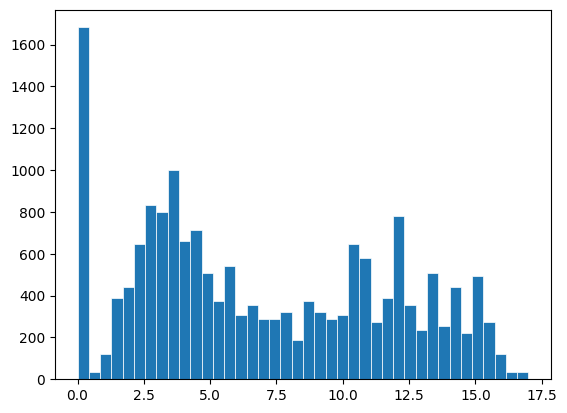

In [33]:
# Verificando o histograma das Fluxo_ar
x = df.Fluxo_ar

# plot:
fig, ax = plt.subplots()

ax.hist(x, bins=40, linewidth=0.5, edgecolor="white")

plt.show()

##### Visualiação Gráfica com Boxplot

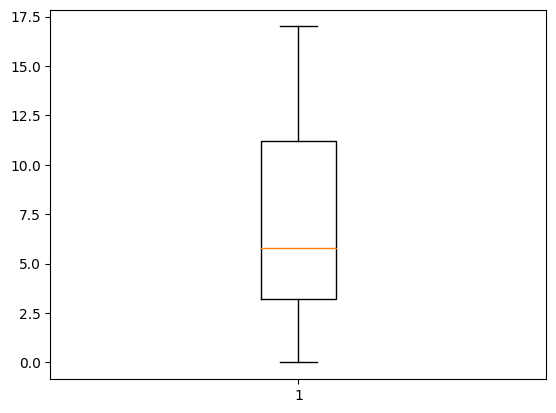

In [34]:
# Verificando o boxplot para a coluna Fluxo_ar
x = df.Fluxo_ar

# plot:
fig, ax = plt.subplots()

ax.boxplot(x)

plt.show()

In [35]:
# Quantidade de Observações por "Frequencia"
df.groupby(['Frequencia']).size()

Frequencia
1     323
2     323
3     323
4     323
5     323
6     323
7     323
8     323
9     323
10    323
11    323
12    323
13    323
14    323
15    323
16    323
17    323
18    323
19    323
20    323
21    323
22    323
23    323
24    323
25    323
26    323
27    323
28    323
30    323
32    323
33    323
34    323
35    323
36    323
38    323
40    323
42    323
44    323
45    323
46    323
47    323
48    323
50    323
51    323
52    323
55    323
60    323
65    323
66    323
67    323
68    323
70    323
72    323
75    323
dtype: int64

##### Visualiação Gráfica com Histograma

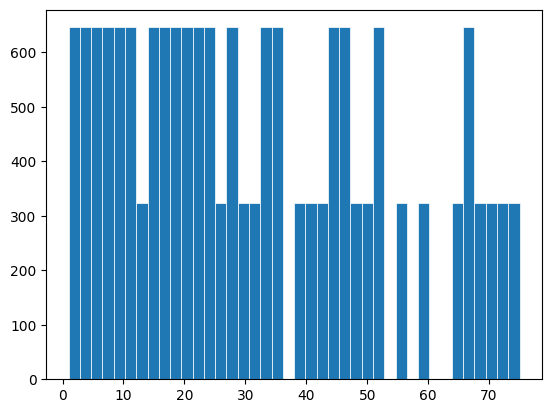

In [36]:
# Verificando o histograma das Frequencia
x = df.Frequencia

# plot:
fig, ax = plt.subplots()

ax.hist(x, bins=40, linewidth=0.5, edgecolor="white")

plt.show()

##### Visualiação Gráfica com Boxplot

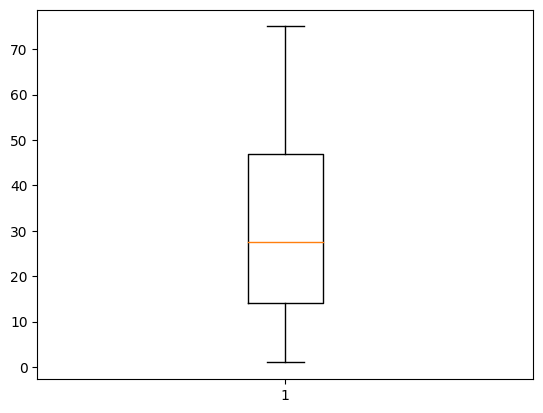

In [37]:
# Verificando o boxplot para a coluna Frequencia
x = df.Frequencia

# plot:
fig, ax = plt.subplots()

ax.boxplot(x)

plt.show()

##### 4) Visualização Conjunta das Variáveis Numéricas com Boxplot - Verificação de Outliers

IndexError: list index out of range

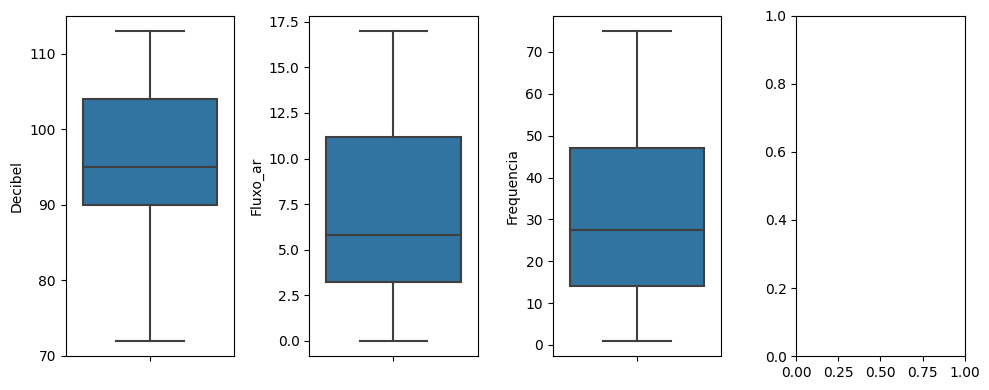

In [38]:
# Define o tamanho da figura e ativa o autolayout
plt.rcParams['figure.figsize']=[10.00, 4.00]
plt.rcParams['figure.autolayout']=True

# Cria uma figura com 1 linha e 4 colunas de subplots
fig, axes = plt.subplots(1, 4)

# Itera sobre as colunas numéricas e cria um boxplot em cada subplot
for i, ax in enumerate(axes):
    sns.boxplot(data=df, y=numericas[i], ax=ax)

plt.show()

##### 5) Visualização Conjunta das Variáveis Categóricas com Barplot - Verificação da Distribuição

In [39]:
# Criando uma lista com os nomes das colunas desejadas
colunas_categoricas = ['Tamanho', 'Combustivel','Distancia','Status']

# Selecionando as colunas desejadas do DataFrame
colunas_categoricas = df[colunas_categoricas]

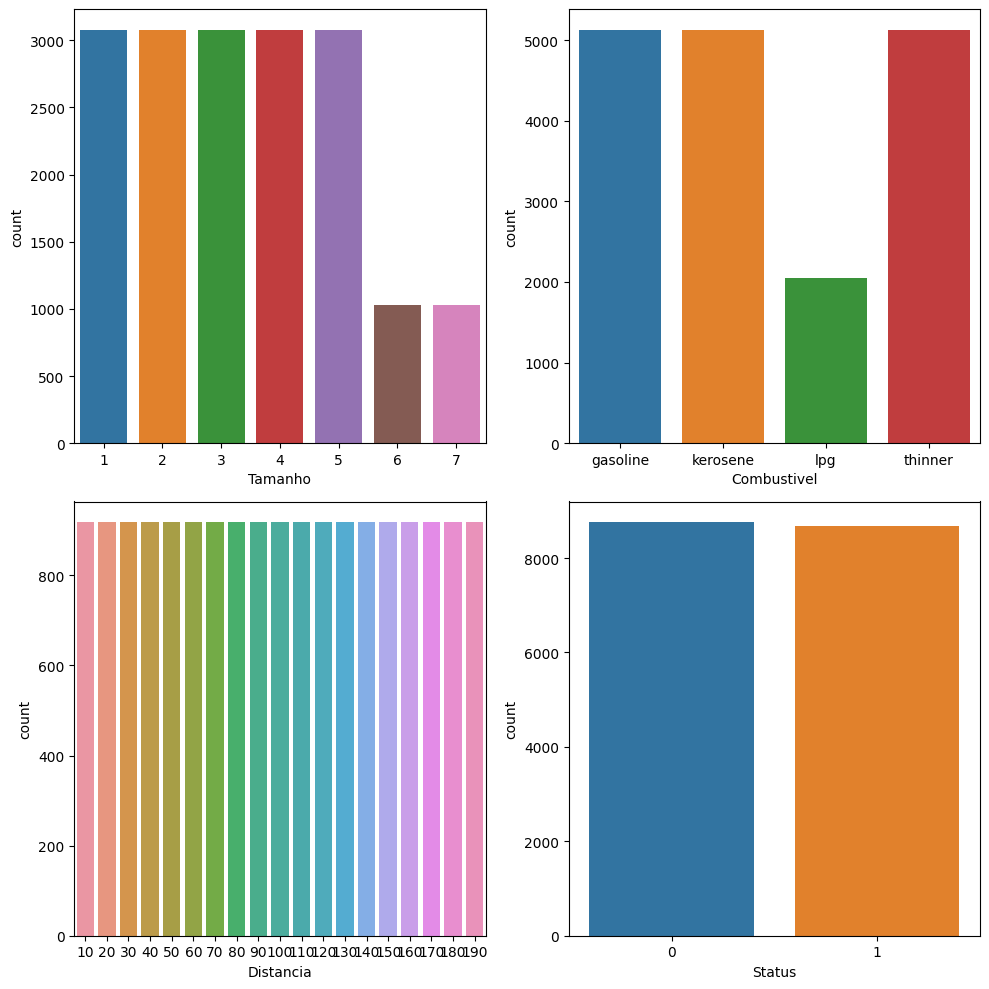

In [40]:
# plotar em gráficos de barras
plt.rcParams["figure.figsize"] = [10.00, 10.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2) #3 linhas e 2 colunas

linha = 0
coluna = 0

for i in colunas_categoricas:
    sns.countplot(data = df, x=i, ax=axes[linha][coluna])

    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0

plt.show()

#### <font color='blue'>5º Etapa - Pré-Processamento dos Dados</font>

##### 1) Transformando as Variáveis Categóricas em Numéricas

In [41]:
lb = LabelEncoder()

# Aplica o encoder nas variáveis que estão como String |ou estão como numéricas mas possui categorias
df['Tamanho'] = lb.fit_transform(df['Tamanho'])
df['Combustivel'] = lb.fit_transform(df['Combustivel'])
df['Distancia'] = lb.fit_transform(df['Distancia'])
df['Status'] = lb.fit_transform(df['Status'])

In [42]:
df.head()

,Tamanho,Combustivel,Distancia,Decibel,Fluxo_ar,Frequencia,Status
0,0,0,0,96,0.00,75,0
1,0,0,0,96,0.00,72,1
2,0,0,0,96,2.60,70,1
3,0,0,0,96,3.20,68,1
4,0,0,0,109,4.50,67,1


##### 2) Análise de Correlação das variáveis Preditoras com a 'Target'

##### Seleção das variáveis

In [43]:
# Criando uma lista com os nomes das variáveis que serão utilizadas
df1 = ['Tamanho','Combustivel','Distancia','Decibel','Fluxo_ar','Frequencia','Status']

# Selecionando as colunas desejadas do DataFrame
df1 = df[df1]

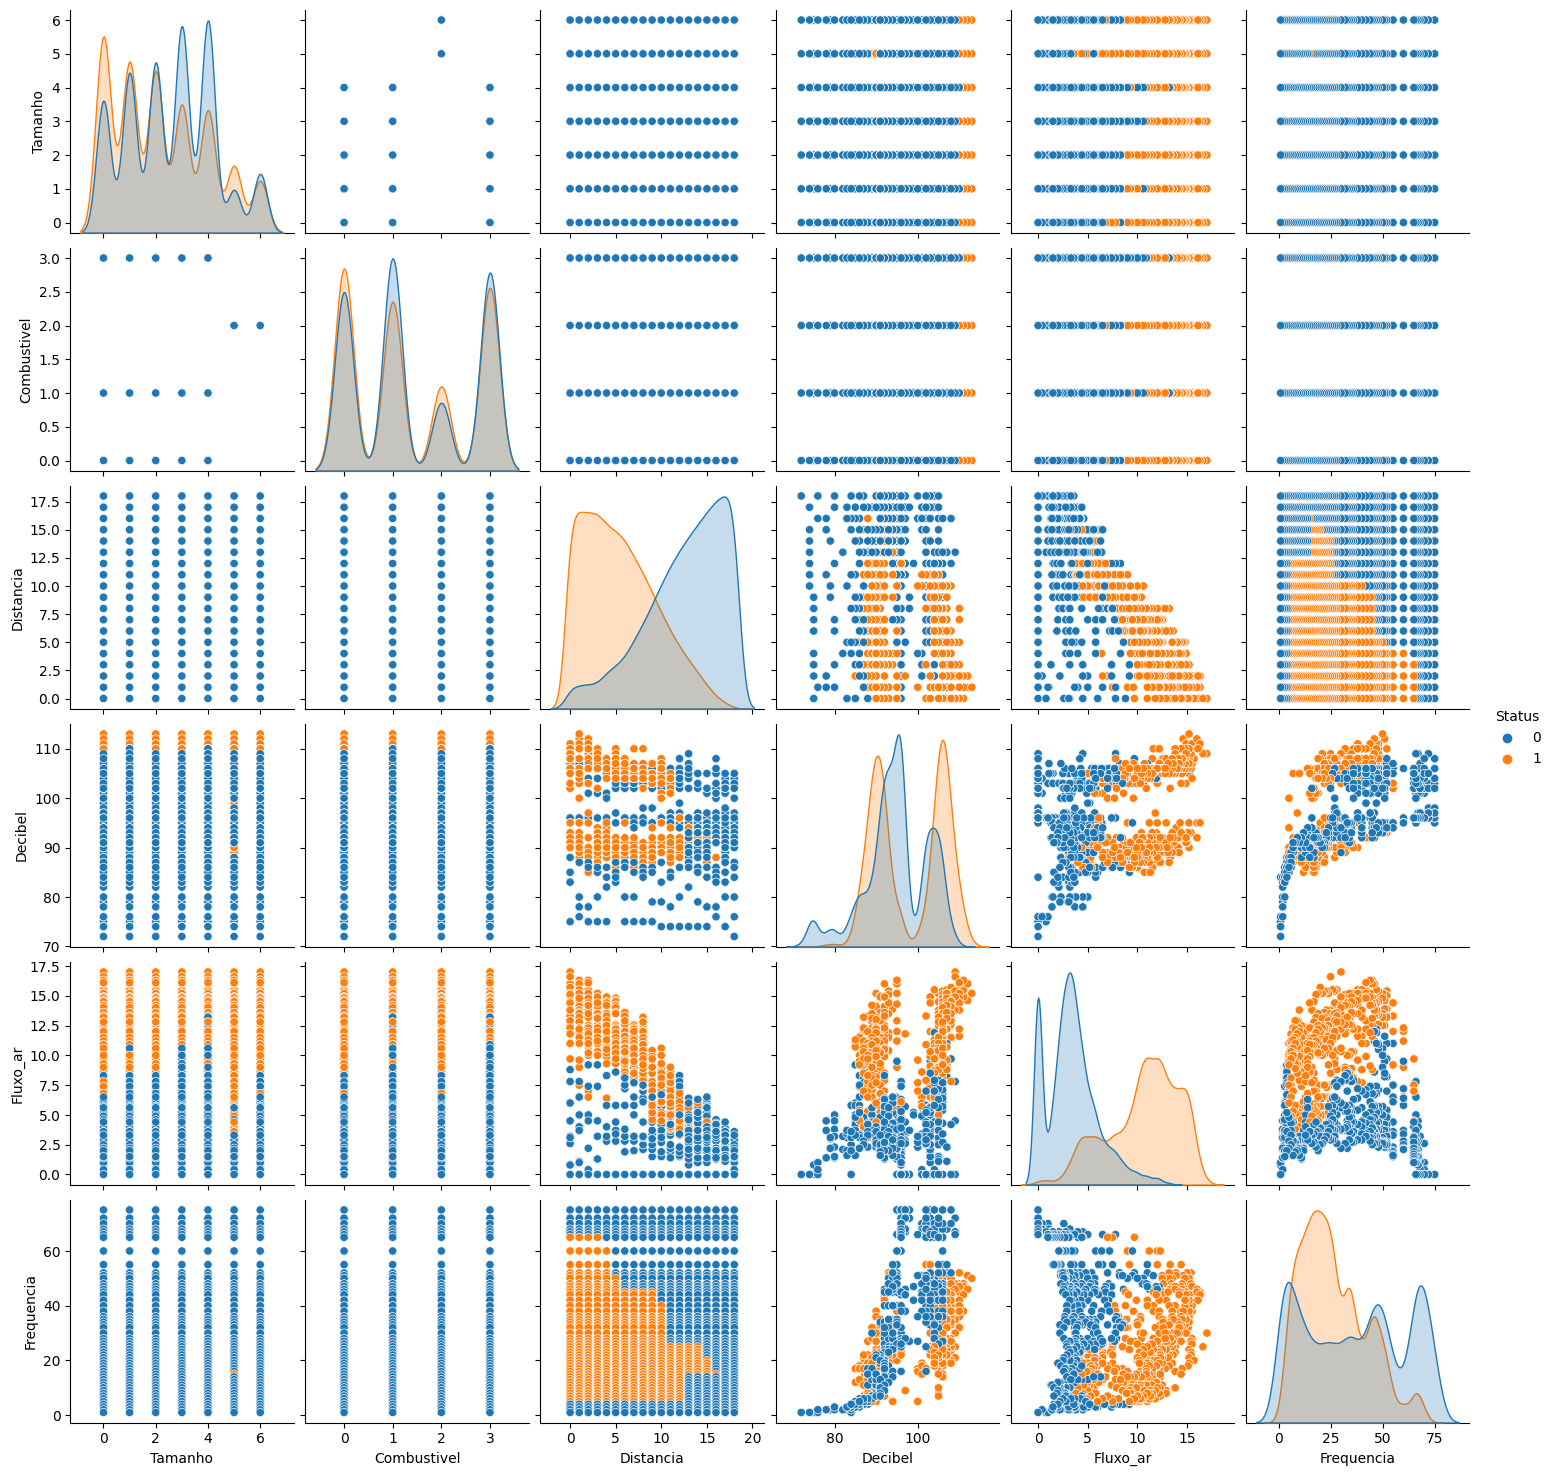

In [44]:
# Criando o pairplot
sns.pairplot(df1, hue = 'Status')

In [45]:
# Criando uma matriz de correlação entre as variáveis
df1.corr()

,Tamanho,Combustivel,Distancia,Decibel,Fluxo_ar,Frequencia,Status
Tamanho,1.00,0.12,-0.00,-0.00,0.00,0.00,-0.10
Combustivel,0.12,1.00,0.00,-0.00,-0.00,-0.00,-0.02
Distancia,-0.00,0.00,1.00,-0.24,-0.71,-0.00,-0.64
Decibel,-0.00,-0.00,-0.24,1.00,0.38,0.56,0.20
Fluxo_ar,0.00,-0.00,-0.71,0.38,1.00,-0.21,0.76
Frequencia,0.00,-0.00,-0.00,0.56,-0.21,1.00,-0.24
Status,-0.10,-0.02,-0.64,0.20,0.76,-0.24,1.00


##### Visualizando de Forma Gráfica

<Axes: >

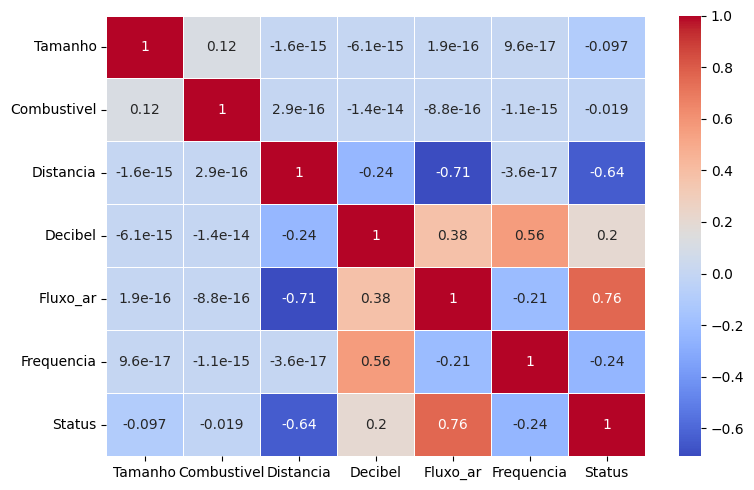

In [46]:
# Utilizando o heatmap do seaborn para tornar essa matriz mais visual
plt.figure(figsize=(8, 5))
sns.heatmap(df1.corr(), annot=True, cmap="coolwarm", linewidths=.5)

##### 3) Interpretando a Matriz de Correlação!

A matriz de correlação nos mostra a força e a direção da relação linear entre duas variáveis. <br>
- O valor próximo de 1 indica uma correlação positiva forte (quando uma aumenta, a outra tende a aumentar).<br>
- O valor próximo de -1 indica uma correlação negativa forte (quando uma aumenta, a outra tende a diminuir).<br>
- O valor próximo de 0 indica que não há uma relação linear significativa entre as variáveis.

| Variável | Correlação com Status | Interpretação |
|:---|:---:|:---|
| Tamanho | -0.10 | Correlação negativa fraca. Um aumento no tamanho está ligeiramente associado a uma diminuição no status. |
| Combustível | -0.02 | Correlação negativa muito fraca, praticamente inexistente. |
| Distância | -0.64 | Correlação negativa moderada. Um aumento na distância está moderadamente associado a uma diminuição no status. |
| Decibel | 0.20 | Correlação positiva fraca. Um aumento no decibel está ligeiramente associado a um aumento no status. |
| Fluxo_ar | 0.76 | Correlação positiva forte. Um aumento no fluxo de ar está fortemente associado a um aumento no status. |
| Frequência | -0.24 | Correlação negativa fraca. Um aumento na frequência está ligeiramente associado a uma diminuição no status. |

- **Correlação não implica causalidade:** Embora a matriz de correlação indique relações entre as variáveis, ela não prova que uma variável causa a outra. Pode haver outras variáveis não observadas que influenciam essas relações.

##### 4) Verificação do Balanceamento da Variável Target

In [53]:
# Visualizando a quantidade da variavel target para balanceamento
df1.Status.value_counts()

Status
0    8759
1    8683
Name: count, dtype: int64

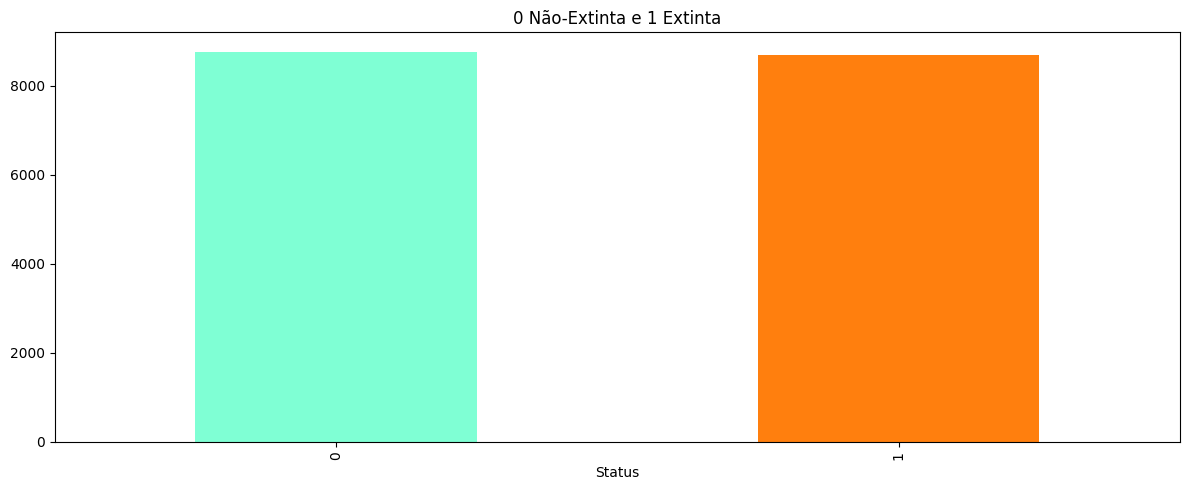

In [48]:
# Visualizando o balanceamento da variável TARGET
plt.rcParams["figure.figsize"] = [12.00, 5.00]
plt.rcParams["figure.autolayout"] = True
df1.Status.value_counts().plot(kind='bar', title='0 Não-Extinta e 1 Extinta',color = ['#7FFFD4', '#FF7F0E']);

##### 5) Separar as Variáveis Preditoras da Target

In [49]:
PREDITORAS = df1.iloc[:, 0:6]
TARGET = df1.iloc[:, 6]

In [50]:
PREDITORAS.head()

,Tamanho,Combustivel,Distancia,Decibel,Fluxo_ar,Frequencia
0,0,0,0,96,0.00,75
1,0,0,0,96,0.00,72
2,0,0,0,96,2.60,70
3,0,0,0,96,3.20,68
4,0,0,0,109,4.50,67


In [51]:
TARGET.head()

0    0
1    1
2    1
3    1
4    1
Name: Status, dtype: int64

##### 6) Aplicação do Balanceamento com Método SMOTE

In [54]:
# Seed para reproduzir o mesmo resultado
seed = 100

# Cria o balanceador SMOTE
balanceador = SMOTE(random_state = seed)

# Aplica o balanceador
PREDITORAS_RES, TARGET_RES = balanceador.fit_resample(PREDITORAS, TARGET)

##### Visualização Gráfica do Balanceamento da Target

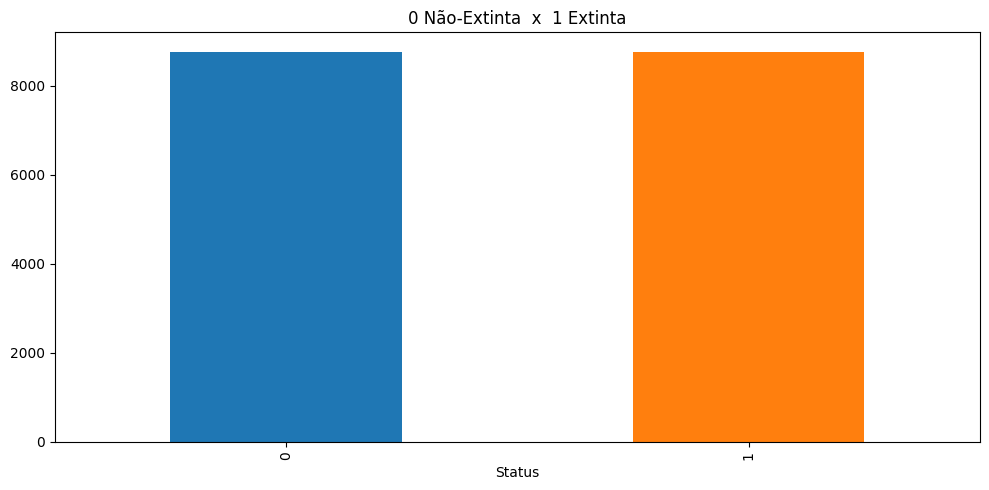

In [55]:
# Visualizando o balanceamento da variável TARGET
plt.rcParams["figure.figsize"] = [10.00, 5.00]
plt.rcParams["figure.autolayout"] = True
TARGET_RES.value_counts().plot(kind='bar', title='0 Não-Extinta  x  1 Extinta',color = ['#1F77B4', '#FF7F0E']);

In [56]:
# Quantidade de registros antes do balanceamento
PREDITORAS.shape

(17442, 6)

In [57]:
# Quantidade de registros antes do balanceamento
TARGET.shape

(17442,)

In [58]:
# Quantidade de registros após o balanceamento
PREDITORAS_RES.shape

(17518, 6)

In [59]:
# Quantidade de registros após o balanceamento
TARGET_RES.shape

(17518,)

#### <font color='blue'>6º Etapa - Preparação dos Dados para Modelagem</font>

##### 1) Fazer a Divisão dos Dados em Treino e Teste

In [60]:
# Divisão dos dados
X_treino, X_teste, Y_treino,Y_teste = train_test_split(PREDITORAS_RES, TARGET_RES, test_size = 0.3, random_state = 42)

In [61]:
X_treino.shape

(12262, 6)

In [62]:
X_treino.head()

,Tamanho,Combustivel,Distancia,Decibel,Fluxo_ar,Frequencia
6195,1,3,0,106,14.40,15
16402,5,2,18,94,2.90,14
5847,0,3,13,93,4.60,45
13367,3,1,0,109,16.60,25
11716,1,1,7,80,3.20,2


##### 2) Normalização dos Dados

In [63]:
# Normalização das Variáveis
Normalizador = MinMaxScaler()
X_treino_normalizados = Normalizador.fit_transform(X_treino)
X_teste_normalizados  = Normalizador.fit_transform(X_teste)

In [64]:
# Visualizando os dados NORMALIZADOS
X_treino_normalizados

array([[0.16666667, 1.        , 0.        , 0.82926829, 0.84705882,
        0.18918919],
       [0.83333333, 0.66666667, 1.        , 0.53658537, 0.17058824,
        0.17567568],
       [0.        , 1.        , 0.72222222, 0.51219512, 0.27058824,
        0.59459459],
       ...,
       [0.        , 1.        , 0.22222222, 0.43902439, 0.60588235,
        0.12162162],
       [0.        , 0.        , 0.83333333, 0.34146341, 0.19411765,
        0.04054054],
       [0.83333333, 0.66666667, 0.38888889, 0.82926829, 0.70588235,
        0.35135135]])

In [65]:
X_treino_normalizados.shape

(12262, 6)

In [66]:
X_teste_normalizados

array([[0.33333333, 1.        , 0.55555556, 0.82926829, 0.58823529,
        0.33783784],
       [0.66666667, 1.        , 0.05555556, 0.80487805, 0.79411765,
        0.39189189],
       [0.        , 0.        , 0.11111111, 0.92682927, 0.94117647,
        0.59459459],
       ...,
       [0.33333333, 0.33333333, 0.55555556, 0.36585366, 0.30588235,
        0.13513514],
       [0.16666667, 0.33333333, 0.44444444, 0.82926829, 0.64705882,
        0.62162162],
       [0.33333333, 1.        , 0.61111111, 0.31707317, 0.24705882,
        0.04054054]])

In [67]:
X_teste_normalizados.shape

(5256, 6)

##### 3) Verificar a Importância das Variáveis para o Modelo

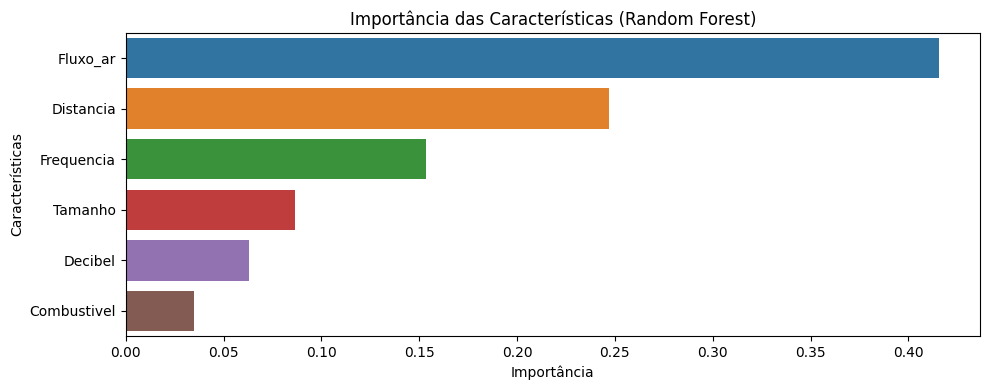

In [68]:
# Treinamento do modelo
clf = RandomForestClassifier(n_estimators=300, criterion='entropy', max_depth=10,
                             max_features='sqrt', min_samples_leaf=2, min_samples_split=2, n_jobs=8)
clf.fit(X_treino_normalizados, Y_treino)

# Importância das features
importances = pd.Series(data=clf.feature_importances_, index=PREDITORAS.columns)
importances = importances.sort_values(ascending=False)

# Visualização
plt.figure(figsize=(10, 4))
sns.barplot(x=importances, y=importances.index)
plt.title('Importância das Características (Random Forest)')
plt.xlabel('Importância')
plt.ylabel('Características')
plt.show()

In [69]:
# Visualizando o percentual de importancia de cada variável
importances.sort_values(ascending = False)

Fluxo_ar      0.42
Distancia     0.25
Frequencia    0.15
Tamanho       0.09
Decibel       0.06
Combustivel   0.03
dtype: float64

##### 4) Escolha do Modelo

##### Utilizando o KNN

In [70]:
# Criando o classificador
neigh = KNeighborsClassifier(n_neighbors = 3)

In [71]:
# Fazendo o Fit com os dados
neigh.fit(X_treino_normalizados, Y_treino)

KNeighborsClassifier(n_neighbors=3)

In [72]:
# Avaliando o Modelo
neigh.score(X_treino_normalizados, Y_treino)

0.985646713423585

##### Utilizando Árvore de Decisão

In [73]:
# criando o classificador
clfArvore = tree.DecisionTreeClassifier(random_state = 0)

In [74]:
# Fazendo o Fit com os dados
clfArvore = clfArvore.fit(X_treino_normalizados, Y_treino)

In [75]:
# Avaliando o Modelo
clfArvore.score(X_treino_normalizados, Y_treino)

1.0

##### Utilizando a Regressão Logística

In [76]:
# Criando o classificador e fazendo o Fit com os dados
clfLog = LogisticRegression(random_state = 0, max_iter = 1000).fit(X_treino_normalizados, Y_treino)

In [77]:
# Avaliando o modelo
clfLog.score(X_treino_normalizados,Y_treino)

0.8761213505137824

##### Utilizando Random Forest

In [78]:
# Criando o classificador
clfFloresta = RandomForestClassifier(n_estimators=100, random_state=0)  # 100 árvores por padrão

In [79]:
# Fazendo o Fit com os dados
clfFloresta = clfFloresta.fit(X_treino_normalizados, Y_treino)

In [80]:
# Avaliando o Modelo
clfFloresta.score(X_treino_normalizados, Y_treino)

1.0

##### Utilizando SVM

In [81]:
# Criando o classificador SVM
clf_svm = SVC(kernel='linear') 

In [82]:
# Fazendo o fit com os dados
clf_svm.fit(X_treino_normalizados, Y_treino)

SVC(kernel='linear')

In [83]:
# Avaliando o Modelo
clf_svm.score(X_treino_normalizados, Y_treino)

0.8764475615723373

##### Utilizando Gradient Boosting

In [84]:
# Criando o classificador Gradient Boosting
clf_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=0)

In [85]:
# Fazendo o fit com os dados
clf_gb.fit(X_treino_normalizados, Y_treino)

GradientBoostingClassifier(random_state=0)

In [86]:
# Avaliando o Modelo
clf_gb.score(X_treino_normalizados, Y_treino)

0.9555537432718969

##### 5) Avaliando os Modelos de Classificação

Para isso, vamos utilizar os dados de teste: X_teste ,  Y_teste

In [87]:
# Predict com o KNN
pred_KNN = neigh.predict(X_teste)

In [88]:
# Predict com a Árvore de Decisão
pred_Arvore = clfArvore.predict(X_teste)

In [89]:
# Predict com Regressão Logística
pred_Log = clfLog.predict(X_teste)

In [90]:
# Predict com Random Forest
pred_floresta = clfFloresta.predict(X_teste)

In [91]:
# Predict com SVM
pred_svm = clf_svm.predict(X_teste)

In [92]:
# Predict com Gradient Boosting
pred_gb = clf_gb.predict(X_teste)

##### Visualizando com Matriz de Confusão

In [93]:
# Verificando a matriz para KNN
confusion_matrix(Y_teste, pred_KNN)

array([[2132,  490],
       [ 339, 2295]], dtype=int64)

In [94]:
# Verificando a matriz para Árvore de Decisão
confusion_matrix(Y_teste, pred_Arvore)

array([[2430,  192],
       [2004,  630]], dtype=int64)

In [95]:
# Verificando a matriz para Regressão Logística
confusion_matrix(Y_teste, pred_Log)

array([[1062, 1560],
       [  77, 2557]], dtype=int64)

In [96]:
# Verificando a matriz para Random Forest
confusion_matrix(Y_teste, pred_floresta)

array([[2339,  283],
       [1839,  795]], dtype=int64)

In [97]:
# Verificando a matriz para SVM
confusion_matrix(Y_teste, pred_svm)

array([[ 664, 1958],
       [  25, 2609]], dtype=int64)

In [98]:
# Verificando a matriz para Gradient Boosting
confusion_matrix(Y_teste, pred_gb)

array([[2339,  283],
       [1840,  794]], dtype=int64)

##### 6) Visualização Gráfica Matriz de Confusão

##### Matriz de Confusão KNN

In [99]:
# Verificando a matriz para o KNN
cm1 = confusion_matrix(Y_teste, pred_KNN)
cm1

array([[2132,  490],
       [ 339, 2295]], dtype=int64)

In [100]:
cm1 = ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels = ["Sim","Não"])

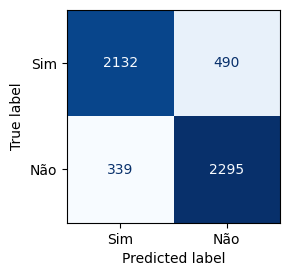

In [101]:
plt.rcParams["figure.figsize"] = [3.00, 3.00]
plt.rcParams["figure.autolayout"] = True
cm1.plot(include_values=True, 
             cmap='Blues',              
             colorbar=None)

##### Matriz de Confusão Árvore de Decisão

In [102]:
# Verificando a Matriz para Árvore de Decisão
cm2 = confusion_matrix(Y_teste,pred_Arvore)
cm2

array([[2430,  192],
       [2004,  630]], dtype=int64)

In [103]:
cm2 = ConfusionMatrixDisplay(confusion_matrix = cm2, display_labels= ["Sim","Não"])

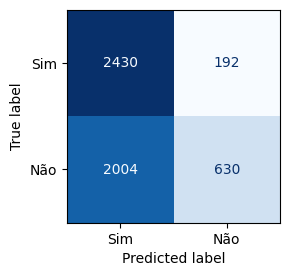

In [104]:
plt.rcParams["figure.figsize"] = [3.00, 3.00]
plt.rcParams["figure.autolayout"] = True
cm2.plot(include_values=True, 
             cmap='Blues',              
             colorbar=None)

##### Matriz de Confusão Regressão Logística

In [105]:
# Verificando a matriz para Regressão Logística
cm3= confusion_matrix(Y_teste, pred_Log)
cm3

array([[1062, 1560],
       [  77, 2557]], dtype=int64)

In [106]:
cm3 = ConfusionMatrixDisplay(confusion_matrix = cm3, display_labels = ["Sim","Não"])

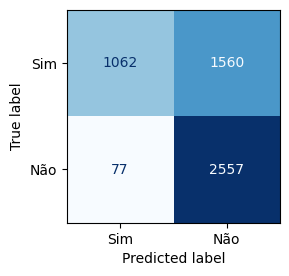

In [107]:
plt.rcParams["figure.figsize"] = [3.00, 3.00]
plt.rcParams["figure.autolayout"] = True
cm3.plot(include_values=True, 
             cmap='Blues',              
             colorbar=None)

##### Matriz de Confusão Random Forest

In [108]:
# Verificando a matriz para o Random Forest
cm4 = confusion_matrix(Y_teste, pred_floresta)
cm4

array([[2339,  283],
       [1839,  795]], dtype=int64)

In [109]:
cm4 = ConfusionMatrixDisplay(confusion_matrix = cm4, display_labels = ["Sim","Não"])

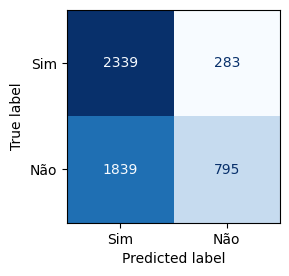

In [110]:
plt.rcParams["figure.figsize"] = [3.00, 3.00]
plt.rcParams["figure.autolayout"] = True
cm4.plot(include_values=True, 
             cmap='Blues',              
             colorbar=None)

##### Matriz de Confusão SVM

In [111]:
# Verificando a matriz para SVM
cm5 = confusion_matrix(Y_teste, pred_svm)
cm5

array([[ 664, 1958],
       [  25, 2609]], dtype=int64)

In [112]:
cm5 = ConfusionMatrixDisplay(confusion_matrix = cm5, display_labels = ["Sim","Não"])

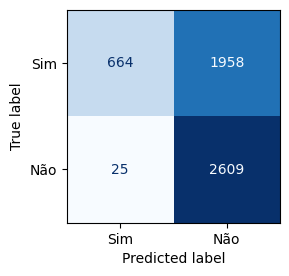

In [113]:
plt.rcParams["figure.figsize"] = [3.00, 3.00]
plt.rcParams["figure.autolayout"] = True
cm5.plot(include_values=True, 
             cmap='Blues',              
             colorbar=None)

##### Matriz de Confusão Gradient Boosting

In [114]:
# Verificando a matriz para o Gradient Boosting
cm6 = confusion_matrix(Y_teste, pred_gb)
cm6

array([[2339,  283],
       [1840,  794]], dtype=int64)

In [115]:
cm6 = ConfusionMatrixDisplay(confusion_matrix = cm6, display_labels = ["Sim","Não"])

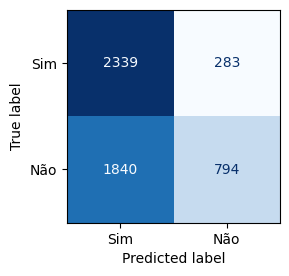

In [116]:
plt.rcParams["figure.figsize"] = [3.00, 3.00]
plt.rcParams["figure.autolayout"] = True
cm6.plot(include_values=True, 
             cmap='Blues',              
             colorbar=None)

##### 7) Verificando as Métricas

##### Acurácia

In [117]:
# Verificando acurácia para o KNN
accuracy_score(Y_teste, pred_KNN)

0.842275494672755

In [118]:
# Verificando acurácia para Árvore de Decisão
accuracy_score(Y_teste, pred_Arvore)

0.5821917808219178

In [119]:
# Verificando acurácia para Regressão Logística
accuracy_score(Y_teste, pred_Log)

0.6885464231354642

In [120]:
# Verificando acurácia para Random Forest
accuracy_score(Y_teste, pred_floresta)

0.5962709284627092

In [121]:
# Verificando acurácia para SVM
accuracy_score(Y_teste, pred_svm)

0.622716894977169

In [122]:
# Verificando acurácia para Gradient Boosting
accuracy_score(Y_teste, pred_gb)

0.5960806697108066

##### Precisão

In [123]:
# Verificando precisão para o KNN
precision_score(Y_teste, pred_KNN)

0.8240574506283662

In [124]:
# Verificando precisão para Árvore de Decisão
precision_score(Y_teste, pred_Arvore)

0.7664233576642335

In [125]:
# Verificando precisão para Regressão Logística
precision_score(Y_teste, pred_Log)

0.6210833130920573

In [126]:
# Verificando precisão para Random Forest
precision_score(Y_teste, pred_floresta)

0.7374768089053804

In [127]:
# Verificando precisão para SVM
precision_score(Y_teste, pred_svm)

0.5712721699146047

In [128]:
# Verificando precisão para Gradient Boosting
precision_score(Y_teste, pred_gb)

0.7372330547818013

##### Recall

In [129]:
# Verificando o recall para o KNN
recall_score(Y_teste, pred_KNN)

0.8712984054669703

In [130]:
# Verificando o recall para Árvore de Decisão
recall_score(Y_teste, pred_Arvore)

0.23917995444191345

In [131]:
# Verificando o recall para Regressão Logística
recall_score(Y_teste, pred_Log)

0.9707668944570995

In [132]:
# Verificando o recall para Random Forest
recall_score(Y_teste, pred_floresta)

0.30182232346241455

In [133]:
# Verificando o recall para SVM
recall_score(Y_teste, pred_svm)

0.9905087319665907

In [134]:
# Verificando o recall para Gradient Boosting
recall_score(Y_teste, pred_gb)

0.3014426727410782

##### 8) Avaliação das Métricas

- **Precisão:** A proporção de predições positivas que são realmente positivas. Uma precisão alta indica que quando o modelo prevê que a chama será extinta, ele está certo na maioria das vezes. A precisão é especialmente útil quando o custo de um falso positivo é alto.
- **Recall:** A proporção de exemplos positivos que são corretamente classificados como positivos. Um recall alto indica que o modelo consegue identificar a maioria dos casos em que a chama é extinta. 
- **F1-score:** A média harmônica de precisão e recall. É uma boa medida geral de desempenho quando se deseja equilibrar precisão e recall.
- **Suporte:** O número de ocorrências de cada classe (neste caso, chama extinta ou não extinta) nos dados de teste.
- **Accuracy:** Proporção de todas as previsões corretas. Pode ser enganosa em conjuntos de dados desbalanceados.

##### KNN

In [135]:
print(classification_report(Y_teste, pred_KNN))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84      2622
           1       0.82      0.87      0.85      2634

    accuracy                           0.84      5256
   macro avg       0.84      0.84      0.84      5256
weighted avg       0.84      0.84      0.84      5256



**Interpretação:** Este modelo tem uma boa performance geral, com uma acurácia de 84%. Ele é equilibrado entre precisão e recall, o que significa que é bom tanto em identificar corretamente as chamas que serão extintas quanto em evitar falsos positivos.

##### Árvore de Decisão

In [136]:
print(classification_report(Y_teste, pred_Arvore))

              precision    recall  f1-score   support

           0       0.55      0.93      0.69      2622
           1       0.77      0.24      0.36      2634

    accuracy                           0.58      5256
   macro avg       0.66      0.58      0.53      5256
weighted avg       0.66      0.58      0.53      5256



**Interpretação:** Este modelo tem uma acurácia mais baixa (58%) e alta precisão para a classe negativa (chama não extinta), mas baixo recall para a classe positiva, desequilíbrio significativo entre precisão e recall, especialmente para a classe 1. Ele é bom em identificar chamas que não serão extintas (classe 0), mas tem dificuldade em prever corretamente as chamas que serão extintas (classe 1). Isso sugere que ele pode estar tendencioso para prever que a chama não será extinta.

##### Regressão Logística

In [137]:
print(classification_report(Y_teste, pred_Log))

              precision    recall  f1-score   support

           0       0.93      0.41      0.56      2622
           1       0.62      0.97      0.76      2634

    accuracy                           0.69      5256
   macro avg       0.78      0.69      0.66      5256
weighted avg       0.78      0.69      0.66      5256



**Interpretação:** Este modelo tem uma acurácia moderada (69%) e é muito bom em identificar chamas que serão extintas (classe 1), mas tem uma precisão mais baixa para a classe 0. Similar à árvore de decisão, com alta precisão para a classe negativa e baixo recall para a classe positiva.

##### Random Forest

In [138]:
print(classification_report(Y_teste, pred_floresta))

              precision    recall  f1-score   support

           0       0.56      0.89      0.69      2622
           1       0.74      0.30      0.43      2634

    accuracy                           0.60      5256
   macro avg       0.65      0.60      0.56      5256
weighted avg       0.65      0.60      0.56      5256



**Interpretação:** Este modelo tem uma acurácia de 60% e é melhor em prever a classe 0 do que a classe 1. Apresentam resultados semelhantes à árvore de decisão e regressão logística, com viés para a classe negativa.

##### SVM

In [139]:
print(classification_report(Y_teste, pred_svm))

              precision    recall  f1-score   support

           0       0.96      0.25      0.40      2622
           1       0.57      0.99      0.72      2634

    accuracy                           0.62      5256
   macro avg       0.77      0.62      0.56      5256
weighted avg       0.77      0.62      0.56      5256



**Interpretação:** Este modelo tem uma acurácia de 62% e é excelente em identificar chamas que serão extintas (classe 1), mas tem uma precisão muito baixa para a classe 0. Tem alta precisão para a classe negativa, mas baixo recall para a classe positiva, similar aos outros modelos.

##### Gradient Boosting

In [140]:
print(classification_report(Y_teste, pred_gb))

              precision    recall  f1-score   support

           0       0.56      0.89      0.69      2622
           1       0.74      0.30      0.43      2634

    accuracy                           0.60      5256
   macro avg       0.65      0.60      0.56      5256
weighted avg       0.65      0.60      0.56      5256



**Interpretação:** Este modelo tem uma performance similar ao modelo de Random Forest, com uma acurácia de 60% e um desempenho melhor para a classe 0.

#### <font color='blue'>7º Etapa - Conclusão</font>

O **modelo KNN** apresenta um desempenho geral satisfatório para ambas as classes. Ele tem uma boa precisão e recall, o que significa que ele está classificando corretamente a maioria dos exemplos e identificando a maioria dos casos positivos.